<a href="https://colab.research.google.com/github/Hyun-Ho95/Web1/blob/master/Mini_project__%EA%B5%AD%EB%AF%BC%EB%8F%99%EC%9D%98%EC%B2%AD%EC%9B%90_%EC%8A%A4%ED%81%AC%EB%9E%98%ED%95%91_%EB%B0%95%ED%98%84%ED%98%B8_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 불러오기

In [14]:
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
#처음에 혜원님처럼 단계별로 시도 후에 json 수집으로 넘어가는게 좋을 것 같아서 내용 수정해 봤습니다!

## url 수집 및 데이터 불러오기
1) requests로 불러오기

In [15]:
#국민동의청원 홈은 requests.get으로 가능한데 동의종료 청원은 requests.get으로 불가능
url = 'https://petitions.assembly.go.kr/closed/agreeEnded'
response = requests.get(url)
response.status_code
#requests.get으로는 안됨

404

2) requests로 불러오기 + header 사용

In [16]:
#header 사용해도 불가능
headers = {"user-agent": "Mozilla/5.0"}
response = requests.get(url)
response.status_code

404

3-1) '네트워크 -> 검사' 파일저장방식 및 위치 찾기(1가지 청원에 관한 내용)

In [ ]:
#청원링크 타고 들어갔을 때 '네트워크'->'Fetch/XHR' 항목에 생기는 주소 값
#키값으로 이루어져 있는 json 형식
#응답헤더 또한 json
#json 형식으로 데이터 받기
url_link = 'https://petitions.assembly.go.kr/api/petits/E28F70BC6E0550F1E054B49691C1987F?petitId=E28F70BC6E0550F1E054B49691C1987F&sttusCode='

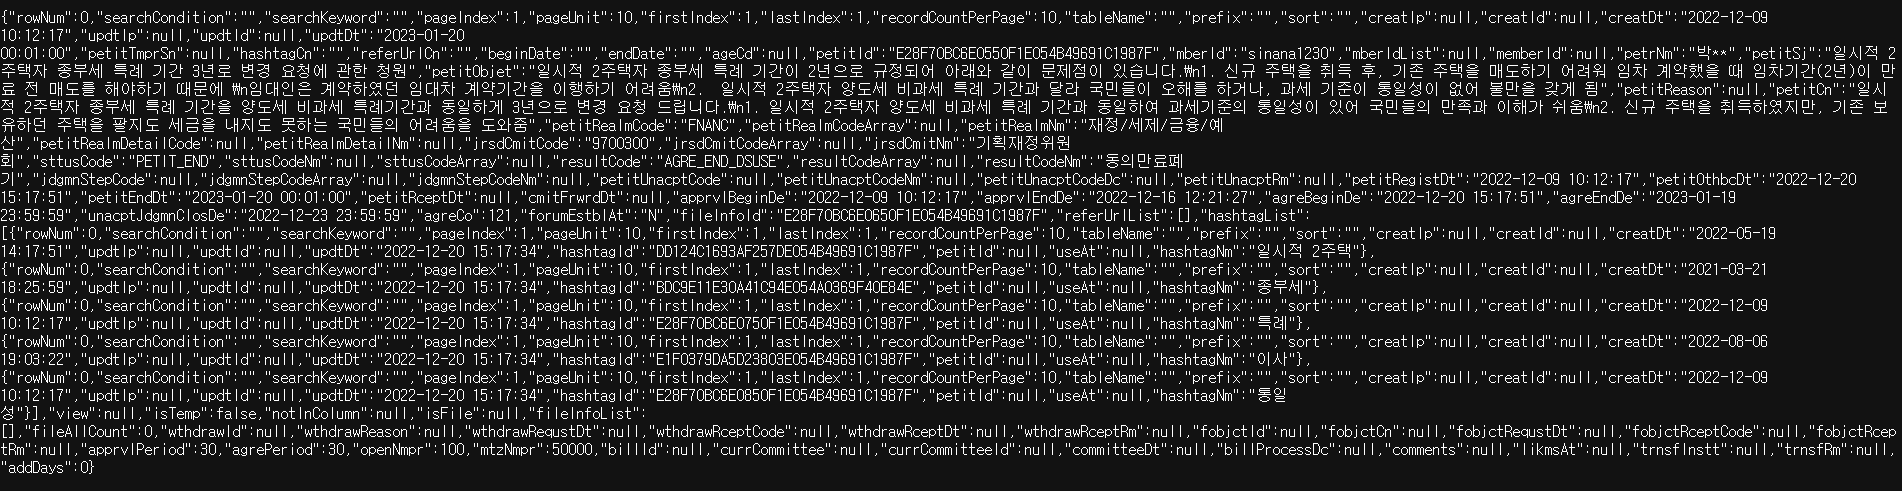

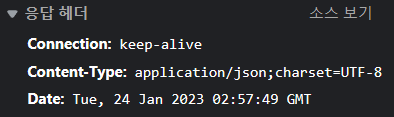

3-2) '네트워크 -> 검사' 파일저장방식 및 위치 찾기 (여러가지 청원에 관한 내용)

In [ ]:
# 청원 페이지 변경 시 생기는 '네트워크'->'Fetch/XHR' 항목에 생기는 주소 값
# 마찬가지로 키값으로 이루어져 있는 json 형식
# 응답헤더 또한 json
url_link_list = 'https://petitions.assembly.go.kr/api/petits?pageIndex=2&recordCountPerPage=8&sort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode=PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn=RESULT_CODE&beginDate=20210124&endDate=20230124&ageCd='

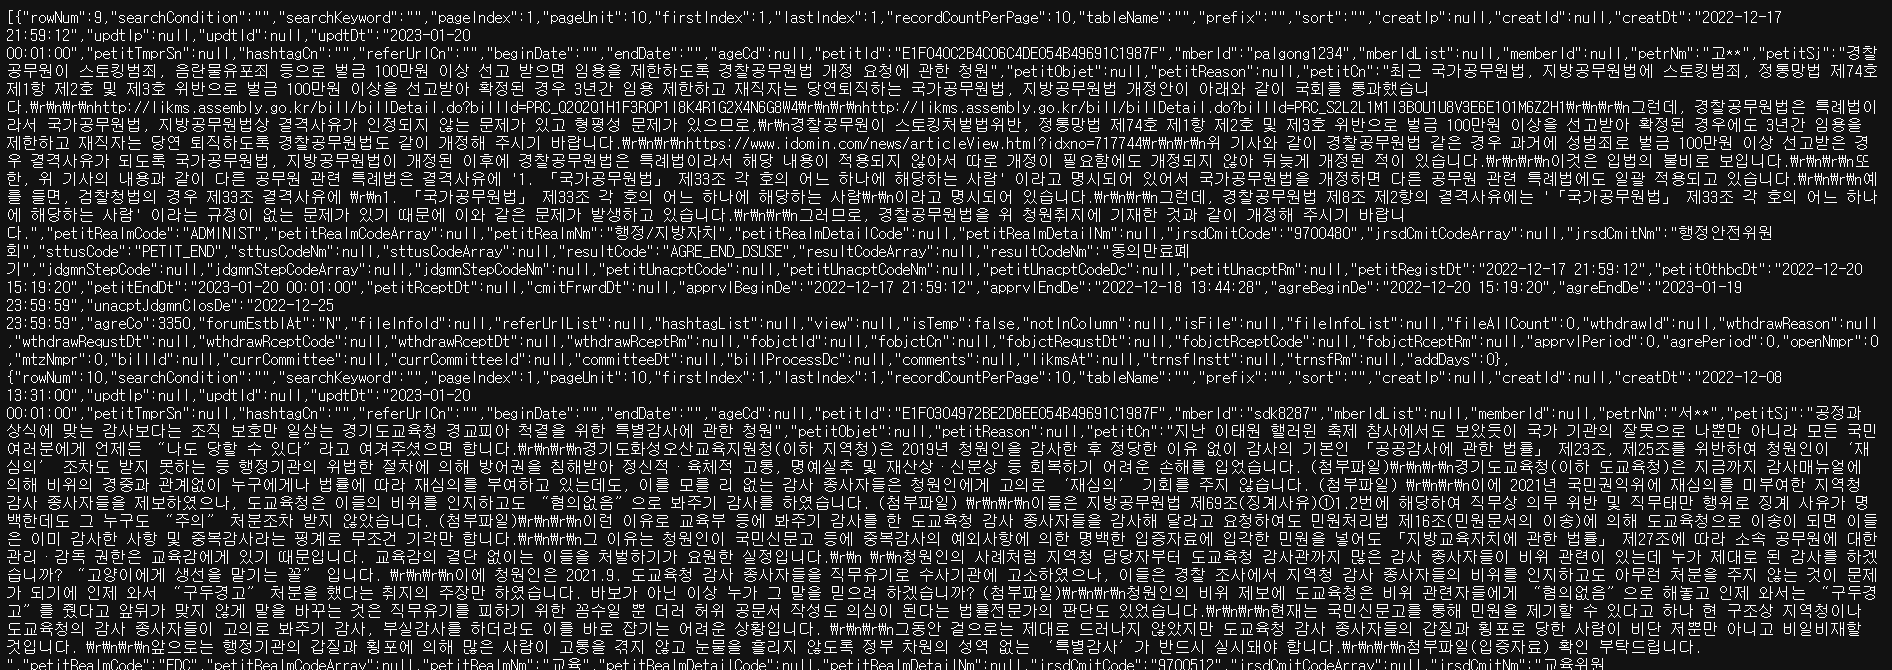

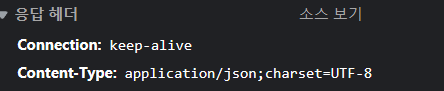

4) 여러가지 청원에 관한 내용 보기위한 url 수집(json) 및 f-string 설정

In [ ]:
page_index = 1

# 페이지 번호와 동의시작 날짜 및 동의종료 날짜는 f-string으로 변경 가능하도록 설정

url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_index}&recordCountPerPage=8&nt_per_pagesort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode='
url = f'{url}PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn='
url = f'{url}RESULT_CODE&beginDate=20210124&endDate=20230124&ageCd='


response = requests.get(url)
response.status_code
# 네트워크 -> 검사 -> Fetch/XHR -> 값복사한 url 사용 후 requests 하니까 성공!

json_list = response.json()
json_list
# .json()은 requests 모듈에 포함된 메서드
# response.text 나 bs(response.text)하는 것보다 훨씬 깔끔하고 보기좋다.
# json 형식의 데이터는 .json()으로 읽자

[{'rowNum': 1,
  'searchCondition': '',
  'searchKeyword': '',
  'pageIndex': 1,
  'pageUnit': 10,
  'firstIndex': 1,
  'lastIndex': 1,
  'recordCountPerPage': 10,
  'tableName': '',
  'prefix': '',
  'sort': '',
  'creatIp': None,
  'creatId': None,
  'creatDt': '2020-12-08 19:25:09',
  'updtIp': None,
  'updtId': None,
  'updtDt': '2021-01-28 00:01:00',
  'petitTmprSn': None,
  'hashtagCn': '',
  'referUrlCn': '',
  'beginDate': '',
  'endDate': '',
  'ageCd': None,
  'petitId': 'B5F25B725BF96A41E054A0369F40E84E',
  'mberId': 'yps001',
  'mberIdList': None,
  'memberId': None,
  'petrNm': '윤**',
  'petitSj': '여성가족부 폐지 등에 관한 청원',
  'petitObjet': None,
  'petitReason': None,
  'petitCn': '여성가족부는,\n보편적 가족서비스의 확대와 여성 청소년 안전강화에 중점을 둔 정책추진을 근거로  2020년 예산 1조 1,264억원(19년 대비 4.3%증가), 2021년 1조 2,325억으로 큰 수준의 예산을 차지하고 있습니다.\n\n여성가족부는,\n여성폭력방지 추진, 한부모,다문화 가정 아이돌봄서비스, 사회 성평등 문화 확산 및 여성 경제활동 촉진, 청소년 주도적 참여활동 및 사회안전망 강화를 표방하고 있으나 실상 수행하는 업무와 성과는 예산의 크기에 미치지 못한다는 지적을 받고 있으며, 그나마 있는 업무 자체도 다른 부처와 많이 

# 해당 청원의 petitId 가져오기

In [ ]:
# 위에서 읽은 json 데이터 
df = pd.DataFrame(json_list)
df
# df 형식으로 바꿔주었는데 빈 프레임
# 모든 json 데이터를 한 리스트에 넣고 한 번에 데이터프레임으로 바꿔주어야 한다고 한다

,rowNum,searchCondition,searchKeyword,pageIndex,pageUnit,firstIndex,lastIndex,recordCountPerPage,tableName,prefix,...,billId,currCommittee,currCommitteeId,committeeDt,billProcessDc,comments,likmsAt,trnsfInstt,trnsfRm,addDays
0,1,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0
1,2,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0
2,3,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0
3,4,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0
4,5,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0
5,6,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0
6,7,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0
7,8,,,1,10,1,1,10,,,...,None,None,None,None,None,None,None,None,None,0


In [ ]:
# 청원내용 상세 페이지 주소
df['petitId'][0]
petitId = 'B5F25B725BF96A41E054A0369F40E84E'
inside_url = f'https://petitions.assembly.go.kr/api/petits/{petitId}?petitId={petitId}&sttusCode='

response_inside = requests.get(inside_url)
response_inside.json()

## 한 페이지를 입력받아, 그 페이지에 존재하는 청원내용을 가져오는 함수



In [ ]:
def get_one_page(page_no):
    #1. url 수집(json형식 확인 + 게시물 고유번호 출력하기)
    url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_index}&recordCountPerPage=8&sort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode='
    url = f'{url}PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn='
    url = f'{url}RESULT_CODE&beginDate=20210124&endDate=20230124&ageCd='    
    response = requests.get(url)
    many_json = response.json()
    df = pd.DataFrame(many_json)
    #df['petitId'] => 게시물들의 고유번호 값

    #3. 각 게시물의 고유번호로 게시물들의 url 수집
    url_list = []
    unique_petit = df['petitId']
    for i in unique_petit:
        inside_url = f'https://petitions.assembly.go.kr/api/petits/{i}?petitId={i}&sttusCode='
        url_list.append(inside_url)

    #4.수집한 url들 데이터프레임으로 생성
    urls_list = []
    for i in url_list:
        #수집된 url들, 각url 마다 json 형식으로 읽어서 리스트에 추가
        response_ =requests.get(i)
        urls_json = response_.json()
        urls_list.append(urls_json)
    #리스트에 추가 된 url들 데이터 프레임으로 만들기
    df_list = pd.DataFrame(urls_list)    
    df_list = pd.read_json(url, encoding = 'UTF-8')[['petitRealmCode', 'petitRealmNm', 'petitSj', 'petitCn', 'jrsdCmitNm', 'resultCodeNm', 'petitEndDt', 'agreBeginDe', 'agreCo']]
    cols = ['분야코드', '분야', '청원제목', '청원내용', '심사위원회', '청원결과', '청원동의 종료일', '청원동의 시작일','청원동의수' ]
    df_list.columns = cols  

    return df_list


In [ ]:
get_one_page(2)

,분야코드,분야,청원제목,청원내용,심사위원회,청원결과,청원동의 종료일,청원동의 시작일,청원동의수
0,TRIT,국토/해양/교통,원주민 전매 허용을 위한 공공주택 특별법 개정 요청에 관한 청원,"공공주택 특별법의 현물보상의 근거(제40조의10,토지등의 수용등) 조항으로 인한 사...",국토교통위원회,동의만료폐기,2023-01-23 00:01:00,2022-12-23 10:24:53,682
1,FARMNG,농업/임업/수산업/축산업,길고양이 학대법 강화 요청에 관한 청원,지난 2월 동탄에서\r\n28세 남성이 100여마리의 길고양이를\r\n입에 담기 어...,농림축산식품해양수산위원회,동의만료폐기,2023-01-21 00:01:00,2022-12-21 18:04:27,563
2,FNANC,재정/세제/금융/예산,일시적 2주택자 종부세 특례 기간 3년로 변경 요청에 관한 청원,일시적 2주택자 종부세 특례 기간을 양도세 비과세 특례기간과 동일하게 3년으로 변경...,기획재정위원회,동의만료폐기,2023-01-20 00:01:00,2022-12-20 15:17:51,121
3,MSFRTN,재난/안전/환경,기상직 면접 미흡 결정 기준과 미흡 상세 이유 통보 요청에 관한 청원,우선 제가 응시한 기상직 7급의 경우 2017년 이후로 5년 만에 시험이 재개가 된...,환경노동위원회,동의만료폐기,2023-01-20 00:01:00,2022-12-20 15:17:17,121
4,ADMINIST,행정/지방자치,외국인 선거권 폐지 요청에 관한 청원,이번에 \n경기도지사 선거에서 표 차이는 8913표 차이였습니다\n현재 \n지방선거...,행정안전위원회,동의만료폐기,2023-01-20 00:01:00,2022-12-20 15:20:45,2618
5,INVST,수사/법무/사법제도,김남국 국회 의원은 양승태 전대법원장 사법 농단 피해자 구제를 위한 특별 법안을 발...,# 아래 관련 파일 첨부 참조 요망 #\n\n법률 제 호\n\n# 양승태 전 대...,법제사법위원회,동의만료폐기,2023-01-20 00:01:00,2022-12-20 15:21:12,197
6,HMCCS,보건의료,실내마스크 전면 해제 요청에 관한 청원,까페에 들어가면\n앉자마자 마스크를 벗고\n대화를 하고 식사를 하고\n다시 카운터 ...,보건복지위원회,동의만료폐기,2023-01-20 00:01:00,2022-12-20 15:21:39,2050
7,TRIT,국토/해양/교통,장기전세 보증금 인상률 1년 납부 유예 및 보증금 인상률 재논의에 관한 청원,"안녕하십니까, 저는 38차 장기전세 거주에 당첨되어 현재 장기전세에 거주하고 있는 ...",국토교통위원회,동의만료폐기,2023-01-20 00:01:00,2022-12-20 15:18:32,500


## 5페이지까지만 가져와보기

In [17]:
from tqdm import trange
import time

# 경고메시지 제거
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)

page_list = []
for page_no in trange(1,5):
    result = get_one_page(page_no)
    page_list.append(result)
    time.sleep(0.01)


100%|██████████| 4/4 [00:55<00:00, 13.90s/it]


## 반복문을 통해 여러 페이지 가져오기

*   마지막 페이지까지 가져오기



## 여러페이지 하나로 합치기

In [23]:
df_list = pd.concat(page_list, ignore_index = True)

## 파일 저장하기

In [25]:
file_name = 'petit_list.csv'
df_list.to_csv(file_name, index = False)

## 파일 불러오기

In [ ]:
pd.read_csv(file_name)

#분석 방향

In [ ]:
# 1. 분야 별 만료폐기 건과 통과된 건 구분
# 2. 심사위원회 별 통과 건
# 3. 만료폐기 건 중 동의 수 30000이 넘는 건(다시 청원시도 하면 가능성이 있는 건)

# 이방향으로 조금 더 시도해보도록 하겠습니다..!

In [ ]:
#1 분야 별로 데이터 수집
response = requests.get(url)
html = bs(response.text)

In [ ]:
petit_df['분야']
#petit_df_medic = petit_df['분야']['보건/의료']